In [1]:
import datetime
import os
import re
import json
from collections import Counter
from pathlib import Path


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [2]:
data_path = Path("../data/opendatascience Slack export Mar 12 2015 - Sep 18 2020")

channels = os.listdir(data_path)
channels_counts = Counter({
    c: len(os.listdir(data_path / c)) for c in channels
    if not c.endswith(".json")
})
channels_counts.most_common(10)

[('_random_talks', 1981),
 ('theory_and_practice', 1853),
 ('deep_learning', 1853),
 ('lang_python', 1830),
 ('interesting_links', 1810),
 ('_jobs', 1779),
 ('_meetings', 1775),
 ('nlp', 1685),
 ('edu_courses', 1666),
 ('kaggle_crackers', 1661)]

# Jobs analytics


In [3]:
jobs_data_path = data_path / "_jobs"

dates = [datetime.datetime.strptime(d.split('.')[0], "%Y-%m-%d") 
         for d in os.listdir(jobs_data_path)]

В динамика вакансий с годами

In [4]:
# Top years
Counter((d.year for d in dates))


Counter({2016: 342, 2019: 350, 2020: 249, 2018: 338, 2017: 349, 2015: 151})

In [5]:
def count_sort_split(data):
    n_posts_by_years = sorted(Counter(data).items(), key = lambda x: x[0])
    keys = [v[0] for v in n_posts_by_years]
    values = [v[1] for v in n_posts_by_years]
    return keys, values

In [6]:
years, posts = count_sort_split((d.year for d in dates))

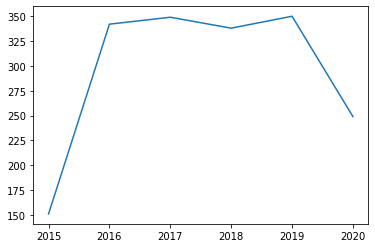

In [7]:
plt.plot(posts)
plt.xticks(range(len(years)), years)
plt.show()

In [8]:
# Top months
months, posts = count_sort_split((d.month for d in dates))

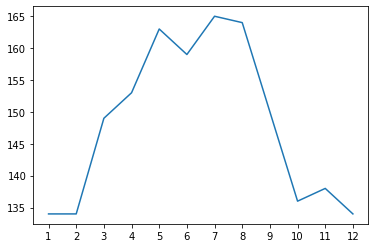

In [9]:
plt.plot(posts)
plt.xticks(range(len(months)), months)
plt.show()

In [10]:
# select vacancies from 2019

files_to_use = [f"{d.strftime('%Y-%m-%d')}.json" 
                    for d in dates if d.year in (2020, 2019)]

In [11]:
len(files_to_use)

599

In [12]:
def extract_salary_from_top_job(data: dict, city=":spb:"):
    rlist = []
    for line in data["text"].split("\n"):
        if city in line:
            if ":fork" in line:
                rlist.append((line,
                              re.findall("\*[A-Za-zа-яА-Я ]+\* by", line),
                              [*map(int, re.findall(r"[0-9]+", line.split(":fork:")[1]))]))
            
    return rlist



In [13]:
with open(jobs_data_path / files_to_use[0]) as f:
    job_dict = json.load(f)

In [14]:
job_dict

[{'client_msg_id': '890cf555-5ebc-4244-80e9-dbb6f79c0a95',
  'type': 'message',
  'text': '&gt; даже если не получится, мы дадим обратную связь по интервью и потом можем еще выслать пример для прокачки скилов.\nВ моем случае даже отказ внятно не сформулировали, не говоря уже о примерах для прокачки.',
  'user': 'U7CAU0GMU',
  'ts': '1574323723.403300',
  'team': 'T040HKJE3',
  'user_team': 'T040HKJE3',
  'source_team': 'T040HKJE3',
  'user_profile': {'avatar_hash': '69c0136d324c',
   'image_72': 'https://avatars.slack-edge.com/2019-10-09/783141116705_69c0136d324c3287ce9d_72.jpg',
   'first_name': 'Andrey',
   'real_name': 'Andrey Kolomiets',
   'display_name': '',
   'team': 'T040HKJE3',
   'name': 'ak.519',
   'is_restricted': False,
   'is_ultra_restricted': False},
  'thread_ts': '1574314111.394300',
  'parent_user_id': 'U52330HTK',
  'reactions': [{'name': 'true-story',
    'users': ['UDSC91AH1', 'U7E8Y3V19', 'U6Y8C4J4F'],
    'count': 3},
   {'name': 'pepe_sad', 'users': ['UMQSP3D

In [15]:
job_dict[0]["text"].split("\n")

['&gt; даже если не получится, мы дадим обратную связь по интервью и потом можем еще выслать пример для прокачки скилов.',
 'В моем случае даже отказ внятно не сформулировали, не говоря уже о примерах для прокачки.']

In [16]:
def get_reactions(data: dict):
    reactions = data.get("reactions", [])
    return reactions
    
def count_reactions(reactions):
    count = 0
    for rea in reactions:
        count += rea.get("count")
    return count

In [49]:
SKIP_MSG_ID = {
    "f3f51036-edcf-466d-b34e-3dbe70ab97af", 
    "28E954FF-E0B0-46C9-9931-26E0888C172C", 
    "eefe5f1c-5da8-4723-ab0d-bb0a9dbf6734",
    "805e8b8e-2c9d-4849-8db0-3973edc78872",
    "e68d1f79-64f5-4018-80fd-8324075894f1",
    "a2004d99-3dd6-4e8f-8f7d-da1df4abb73a",
    "a134cb0f-311a-4bdd-b628-68c6bd17226b",
    "367f783f-2f24-4cc6-b190-31749b370de2",
    "8a80f647-e58d-4a39-a314-75c7cfcc14f5",
    "1c390ef1-291e-4cca-8ac7-b8ce534a6b28",
    "ab86e977-8297-4e0a-9ee5-2c2c0f2a8902",
    "0d8dea90-251c-4d7e-88e8-2c27d7f318e8",
    "056759f1-6b5b-4da3-a295-830b31304ebc",
    "379a8924-7ae4-42a3-a081-b52f40d4d66e",
    "bbab8c62-f139-4907-810a-4c68f669318a",
    "90f77747-ffa5-4afd-ba98-dd79b0bb6090",
    "fbe31efe-507d-4c9d-a1b5-82ddb4f4ad8e",
    "346cf164-f9b2-401a-ae38-f99867b2d969",
    "547ea055-9b0c-480a-841c-1307575dd87a",
    "38c16c24-8a4b-42df-8219-d87339a1e6a3",
    "2b1c6326-5609-4e8e-b454-e27dc12f19b8",
}

def extract_salary_from_job(data: dict):
    if (
        data.get('subtype') in ("tombstone", "channel_join") 
        or data.get("client_msg_id") in SKIP_MSG_ID 
        or len(re.findall(r"[\d]+", data["text"])) == 0
        or count_reactions(get_reactions(data)) <= 1
    ):
        return None
    salaries = re.findall(r"\d{2,3}\s{0,1}\d{0,3}[К|к|k]{0,1}[\s]{0,1}[-|–][\s]{0,1}\d{2,3}\s{0,1}\d{0,3}[К|к|k]{0,1}", data["text"])
    if len(salaries) != 1:
        if data.get("client_msg_id") in {
            "2dfd68eb-13a2-470f-b5db-0d2edba1f1b6", 
            "33f58ac1-1497-488f-afb2-32535f55e037",
            "826ac662-db26-44c1-9fcd-d191cc41513c",
        }:
            return [salaries[1]]
        elif len(salaries) == 0 or "client_msg_id" not in data:
            return None
        else:
            print(salaries, data["client_msg_id"])
    return salaries

In [50]:
salaries = []
for job_file in tqdm(files_to_use):
    with open(jobs_data_path / job_file) as f:
        job_dict = json.load(f)
    salary = extract_salary_from_job(job_dict[0])
    if salary is not None:
        salaries += salary

['60 000 - 110 000', '110 000 - 190 000', '190 000 - 300 000'] 9b415aed-8a0c-4b23-b4b0-8e6413c9e76a
['100-200 ', '619 56-98 '] 2ba00c1b-ba46-44f9-ad60-218494ae79eb
['100-170 ', '180-250 '] aaee2eef-3af3-49a3-a048-8a4dfa9585bb
['170-250 ', '80-100k'] 90512c69-61f3-4f10-9824-ff0c062e4805
['140-150', '45-50'] 833dd0b8-e037-43dd-a7b2-686e3505722a
['00 – 18', '00 – 16', '60-200 '] f9803a2b-ee4b-4524-9eda-5f8fe2157322
['998-665', '53k-55k'] 5d3e09e8-6b5b-4615-8c18-e52185048839
['150-210 ', '210-300 '] ba4aea77-9228-45ae-9a9e-302cefb46c4c
['55-70К', '10-15'] 251807f0-d508-44a4-812d-a5a048b47e78
['100-180k', '100-180k'] d2dd40f7-572f-4666-9e8c-028672281d9f
['70 - 110 ', '110 - 180 '] b43cbf21-9030-4be4-ba4f-ae2aeb5358af
['1500-3000', '3000-5000'] c2869a72-f7de-402a-adde-80dddded2e66
['200-350К', '200-350 '] a96bf143-0f76-48a7-a894-fcd5944e55b2
['100 - 130\n', '140 - 180\n', '180 - 250\n'] 4fbc8bab-af30-4a81-b7db-ab164d1e69f6
['90 - 120к', '18-24к'] 6019e8da-549d-43b7-b9a3-3d410377b02a
['150 - 

In [51]:
len(salaries)

155

In [20]:
salaries

['60 000 - 110 000',
 '100 - 250 ',
 '00 - 10',
 '125-150к',
 '80 000 - 120 000',
 '100К – 140К',
 '150 000 - 300 000',
 '1700-2500',
 '000–300',
 '200-300 ',
 '100-200 ',
 '145-190 ',
 '50-100 ',
 '100 - 200\n',
 '180-280 ',
 '60-110К',
 '100-170 ',
 '60-85k',
 '200-300 ',
 '200-230',
 '170-230 ',
 '170-250 ',
 '120 - 190k',
 '100 - 150К',
 '150-250 ',
 '1500 – 3500',
 '100к - 300к',
 '100k – 140k',
 '200-300 ',
 '160-220 ',
 '120к – 150к',
 '50–120 ',
 '250-350 ',
 '300к – 360к',
 '160-220',
 '800 - 850 ',
 '200-250к',
 '140-150',
 '180-220 ',
 '350-450 ',
 '130-195 ',
 '130-180К',
 '150-200к',
 '90-140К',
 '00 – 18',
 '998-665',
 '170-250к',
 '4000 - 6000',
 '2500-4000',
 '250 - 450',
 '150-200К',
 '230-300 ',
 '200-300К',
 '150-210 ',
 '55-70К',
 '150-250к',
 '120-150 ',
 '2000-2500',
 '100-200 ',
 '11-00',
 '12-00',
 '100-180k',
 '140-200к',
 '110 - 180 ',
 '80 000-180\xa0000',
 '75000-90000',
 '130-200 ',
 '120-180 ',
 '000–180',
 '120-220 ',
 '200к – 300к',
 '200-400',
 '70 - 11

In [28]:
def clean_salary(slr):
    slr = "".join(slr.split())
    slr = slr.strip("кКk \n")
    if 3 >= len(slr) >= 2:
        slr += "000"
    elif len(slr) == 4:
        return None
    slr = int(slr) or None
    return slr

def parse_salary(line: str):
    if "–" in line:
        low, high = line.split("–")
    else:
        low, high = line.split("-")
        
    return low, high

In [52]:
lows = []
highs = []
for sal in salaries:
    low, high = parse_salary(sal)
    low, high = map(clean_salary, (low, high))
    if (low is not None) and (high is not None):
        lows.append(low/1000)
        highs.append(high/1000)

In [53]:
len(lows)

131

In [54]:
np.mean(lows)

147.48058015267173

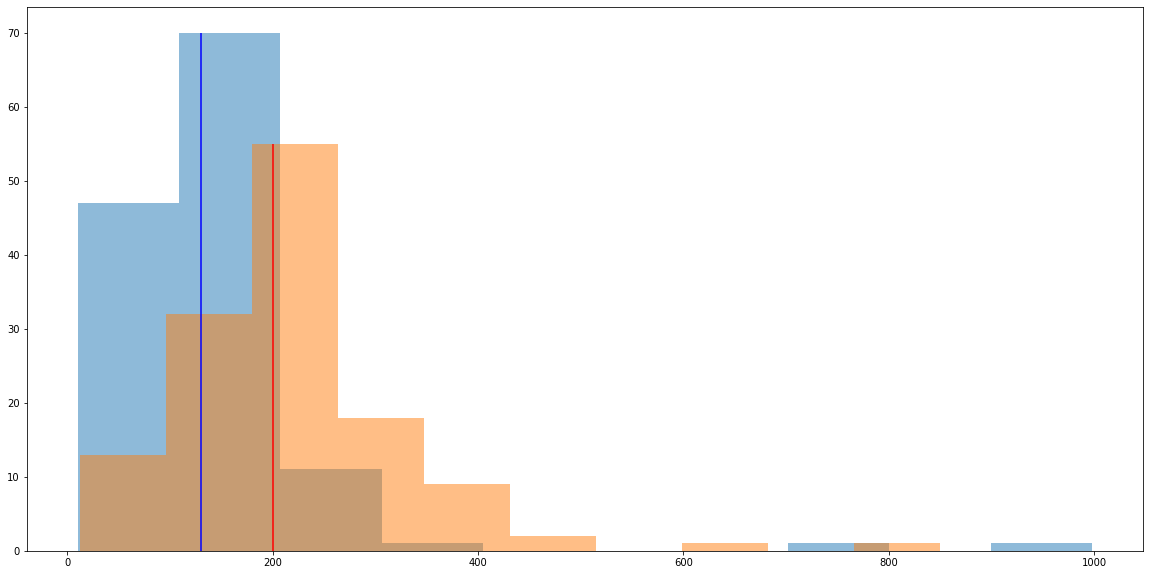

In [63]:
plt.figure(figsize=(20, 10))
plt.hist(lows, alpha=0.5)
plt.hist(highs, alpha=0.5)
plt.vlines(np.median(lows), 0, 70, color="blue")
plt.vlines(np.median(highs), 0, 55, color="red")

In [64]:
pd.Series(lows).describe()

count    131.000000
mean     147.480580
std      113.412868
min       10.000000
25%      100.000000
50%      130.000000
75%      180.000000
max      998.000000
dtype: float64

In [65]:
pd.Series(highs).describe()

count    131.000000
mean     211.480916
std      114.123978
min       12.000000
25%      145.000000
50%      200.000000
75%      255.000000
max      850.000000
dtype: float64